In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ddir = "/u/home/f/f7xiesnm/project-zipursky/data/abc_atlas/Zhuang-ABCA-1/20230831"
f1 = ddir + '/cell_metadata_with_cluster_annotation.csv'
f2 = ddir + '/Zhuang-ABCA-1-raw.h5ad'

In [4]:
meta = pd.read_csv(f1)
meta

,cell_label,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
0,182941331246012878296807398333956011710,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,704,0.682522,3.366483,7.829530,...,GABA,06 CTX-CGE GABA,049 Lamp5 Gaba,0199 Lamp5 Gaba_1,0709 Lamp5 Gaba_1,#FF3358,#CCFF33,#FF764D,#DC00FF,#998900
1,221260934538535633595532020856387724686,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5243,0.667690,3.442241,7.829530,...,NaN,33 Vascular,331 Peri NN,1191 Peri NN_1,5304 Peri NN_1,#666666,#858881,#82992E,#2F00CC,#BB1FCC
2,22228792606814781533240955623030943708,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.638731,3.474328,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
3,272043042552227961220474294517855477150,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,0.653425,3.433218,7.829530,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
4,110116287883089187971185374239350249328,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5254,0.623896,3.513574,7.829530,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846903,94310525370042131911495836073267655162,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5255,0.997247,3.823236,9.717769,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5311 Endo NN_1,#666666,#858881,#994567,#00992A,#CC3D76
2846904,298798481479578578007190103666214714353,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,14939,1.043871,3.706231,9.717769,...,NaN,30 Astro-Epen,319 Astro-TE NN,1163 Astro-TE NN_3,5225 Astro-TE NN_3,#666666,#594a26,#3DCCB1,#a8afa5,#551799
2846905,330756942354980576352210203729462562749,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5261,1.037680,3.759890,9.717769,...,NaN,33 Vascular,330 VLMC NN,1188 VLMC NN_2,5301 VLMC NN_2,#666666,#858881,#653D66,#4D5CFF,#79CC5C
2846906,47305871059582831548494138048361484565,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,5252,1.044169,3.758463,9.717769,...,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994


In [5]:
meta.columns

Index(['cell_label', 'brain_section_label', 'feature_matrix_label',
       'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y',
       'z', 'subclass_confidence_score', 'cluster_confidence_score',
       'high_quality_transfer', 'neurotransmitter', 'class', 'subclass',
       'supertype', 'cluster', 'neurotransmitter_color', 'class_color',
       'subclass_color', 'supertype_color', 'cluster_color'],
      dtype='object')

In [6]:
meta['cluster_alias'].unique()

array([  704,  5243, 14939, ...,  2623,  2652,  2657])

In [13]:
np.unique(meta['class']) #.unique()

array(['01 IT-ET Glut', '02 NP-CT-L6b Glut', '03 OB-CR Glut',
       '04 DG-IMN Glut', '05 OB-IMN GABA', '06 CTX-CGE GABA',
       '07 CTX-MGE GABA', '08 CNU-MGE GABA', '09 CNU-LGE GABA',
       '10 LSX GABA', '11 CNU-HYa GABA', '12 HY GABA', '13 CNU-HYa Glut',
       '14 HY Glut', '15 HY Gnrh1 Glut', '16 HY MM Glut', '17 MH-LH Glut',
       '18 TH Glut', '19 MB Glut', '20 MB GABA', '21 MB Dopa',
       '22 MB-HB Sero', '23 P Glut', '24 MY Glut', '25 Pineal Glut',
       '26 P GABA', '27 MY GABA', '28 CB GABA', '29 CB Glut',
       '30 Astro-Epen', '31 OPC-Oligo', '32 OEC', '33 Vascular',
       '34 Immune'], dtype=object)

In [14]:
np.unique(meta['subclass'])

array(['001 CLA-EPd-CTX Car3 Glut', '002 IT EP-CLA Glut',
       '003 L5/6 IT TPE-ENT Glut', '004 L6 IT CTX Glut',
       '005 L5 IT CTX Glut', '006 L4/5 IT CTX Glut',
       '007 L2/3 IT CTX Glut', '008 L2/3 IT ENT Glut',
       '009 L2/3 IT PIR-ENTl Glut', '010 IT AON-TT-DP Glut',
       '011 L2 IT ENT-po Glut', '012 MEA Slc17a7 Glut',
       '013 COAp Grxcr2 Glut', '014 LA-BLA-BMA-PA Glut',
       '015 ENTmv-PA-COAp Glut', '016 CA1-ProS Glut', '017 CA3 Glut',
       '018 L2 IT PPP-APr Glut', '019 L2/3 IT PPP Glut',
       '020 L2/3 IT RSP Glut', '021 L4 RSP-ACA Glut',
       '022 L5 ET CTX Glut', '023 SUB-ProS Glut', '024 L5 PPP Glut',
       '025 CA2-FC-IG Glut', '026 NLOT Rho Glut', '027 L6b EPd Glut',
       '028 L6b/CT ENT Glut', '029 L6b CTX Glut', '030 L6 CT CTX Glut',
       '031 CT SUB Glut', '032 L5 NP CTX Glut', '033 NP SUB Glut',
       '034 NP PPP Glut', '035 OB Eomes Ms4a15 Glut', '036 HPF CR Glut',
       '037 DG Glut', '038 DG-PIR Ex IMN', '039 OB Meis2 Thsd7b Gaba',


In [15]:
metasub = meta[meta['subclass'] == '007 L2/3 IT CTX Glut']
metasub

,cell_label,brain_section_label,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
26,193467560145029549698621814618068646692,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,243,0.716910,3.764470,7.829530,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0113 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#4DBDFF
45,143795643695719616863922826907770581831,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,0.740479,4.075704,7.829530,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
46,146348436271229422415293281643148356382,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,0.741862,3.910122,7.829530,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
58,278645763488428414844834985302551688241,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,0.725959,3.881817,7.829530,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
61,282892316095591737203933015641888948416,Zhuang-ABCA-1.089,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,0.734363,4.032128,7.829530,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846593,94731202502411045880910198694687377550,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,1.347500,2.814922,9.717769,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
2846600,173198511131248229167551684169122508473,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,1.378633,2.753863,9.717769,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E
2846601,180057118992192615501073142607003425327,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,233,1.354515,2.748761,9.717769,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0030 L2/3 IT CTX Glut_2,0110 L2/3 IT CTX Glut_2,#2B93DF,#FA0087,#E9530F,#CC7A8F,#FFEC99
2846607,221512805930945316853621272768045586446,Zhuang-ABCA-1.110,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,230,1.366378,2.749601,9.717769,...,Glut,01 IT-ET Glut,007 L2/3 IT CTX Glut,0031 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,#2B93DF,#FA0087,#E9530F,#5C6899,#43992E


In [18]:
np.unique(metasub['class'])

array(['01 IT-ET Glut'], dtype=object)

In [19]:
np.unique(metasub['subclass'])

array(['007 L2/3 IT CTX Glut'], dtype=object)

In [16]:
np.unique(metasub['supertype'])

array(['0029 L2/3 IT CTX Glut_1', '0030 L2/3 IT CTX Glut_2',
       '0031 L2/3 IT CTX Glut_3', '0032 L2/3 IT CTX Glut_4'], dtype=object)

In [17]:
np.unique(metasub['cluster'])

array(['0103 L2/3 IT CTX Glut_1', '0104 L2/3 IT CTX Glut_1',
       '0105 L2/3 IT CTX Glut_1', '0106 L2/3 IT CTX Glut_1',
       '0107 L2/3 IT CTX Glut_1', '0108 L2/3 IT CTX Glut_2',
       '0109 L2/3 IT CTX Glut_2', '0110 L2/3 IT CTX Glut_2',
       '0111 L2/3 IT CTX Glut_2', '0112 L2/3 IT CTX Glut_2',
       '0113 L2/3 IT CTX Glut_3', '0114 L2/3 IT CTX Glut_3',
       '0115 L2/3 IT CTX Glut_3', '0116 L2/3 IT CTX Glut_3',
       '0117 L2/3 IT CTX Glut_4', '0118 L2/3 IT CTX Glut_4',
       '0119 L2/3 IT CTX Glut_4', '0120 L2/3 IT CTX Glut_4'], dtype=object)

In [52]:
metasub.groupby(['supertype', 'cluster']).size().unstack().fillna(0).astype(int0).astype(int0).astype(int0).astype(int0).astype(int0).astype(int0).astype(int0).astype(int0).astype(int)

cluster,0103 L2/3 IT CTX Glut_1,0104 L2/3 IT CTX Glut_1,0105 L2/3 IT CTX Glut_1,0106 L2/3 IT CTX Glut_1,0107 L2/3 IT CTX Glut_1,0108 L2/3 IT CTX Glut_2,0109 L2/3 IT CTX Glut_2,0110 L2/3 IT CTX Glut_2,0111 L2/3 IT CTX Glut_2,0112 L2/3 IT CTX Glut_2,0113 L2/3 IT CTX Glut_3,0114 L2/3 IT CTX Glut_3,0115 L2/3 IT CTX Glut_3,0116 L2/3 IT CTX Glut_3,0117 L2/3 IT CTX Glut_4,0118 L2/3 IT CTX Glut_4,0119 L2/3 IT CTX Glut_4,0120 L2/3 IT CTX Glut_4
supertype,,,,,,,,,,,,,,,,,,
0029 L2/3 IT CTX Glut_1,53,607,5495,274,84,0,0,0,0,0,0,0,0,0,0,0,0,0
0030 L2/3 IT CTX Glut_2,0,0,0,0,0,46,74627,3620,415,1865,0,0,0,0,0,0,0,0
0031 L2/3 IT CTX Glut_3,0,0,0,0,0,0,0,0,0,0,559,1242,176,4642,0,0,0,0
0032 L2/3 IT CTX Glut_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,821,1927,48,10


In [46]:
dfplot = metasub[metasub['brain_section_label']=='Zhuang-ABCA-1.105']

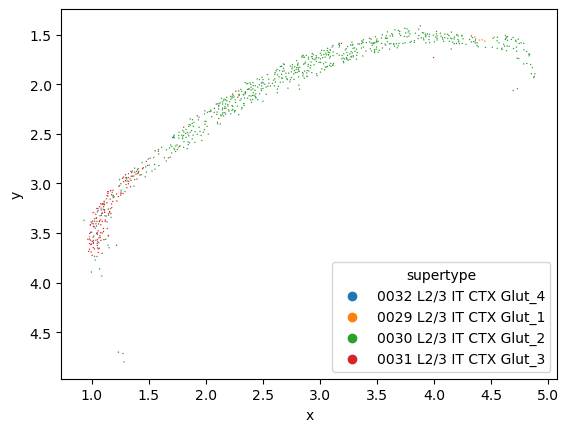

In [47]:
sns.scatterplot(data=dfplot, x='x', y='y', hue='supertype', s=1, edgecolor='none') #  color='k')
plt.gca().invert_yaxis()

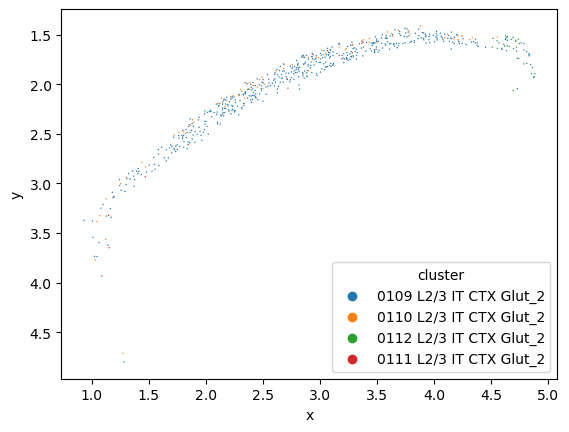

In [48]:
sns.scatterplot(data=dfplot[dfplot['supertype']=='0030 L2/3 IT CTX Glut_2'], x='x', y='y', hue='cluster', s=1, edgecolor='none') #  color='k')
plt.gca().invert_yaxis()

# go wider (more slices) and figure it out